## Salary Prediction

### Content:

This dataset contains employee details including age, gender, educational level etc
The file is in CSV format and can be used directly for data analysis and machine learning tasks.

### Context:

The Salary Prediction Dataset is designed to help learners and researchers understand how an employee's experience and education influence their salary.
It can be used for:

1) Building regression models

2) Practicing data visualization

3) Exploring real-world salary prediction problems

This dataset contain the following columns:

**Age:** The age of the employee.

**Gender:** The gender of the employee(male/female).

**Education:** The highest educational qualification of the employee.

**Job title:** The current job rule of the employee.

**Years of Experience:** The total experience year of employee.

**Salary:** The annual salary of the employee in dollars.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [2]:
df_prediction = pd.read_csv('../data/Salary_Data.csv')
df_prediction.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6703 entries, 0 to 6702
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.3+ KB


In [4]:
df_prediction.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


## Cleaning

In [5]:
df_prediction = df_prediction.dropna()

In [6]:
df_prediction.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [7]:
df_prediction.shape

(6698, 6)

## Visualization

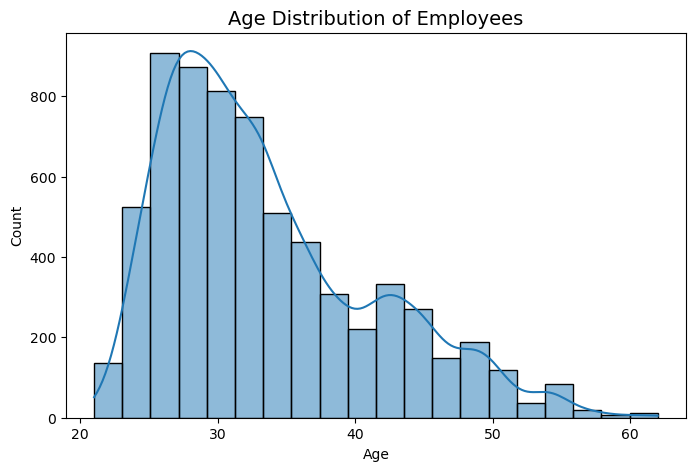

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df_prediction['Age'], kde=True, bins=20)
plt.title('Age Distribution of Employees', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

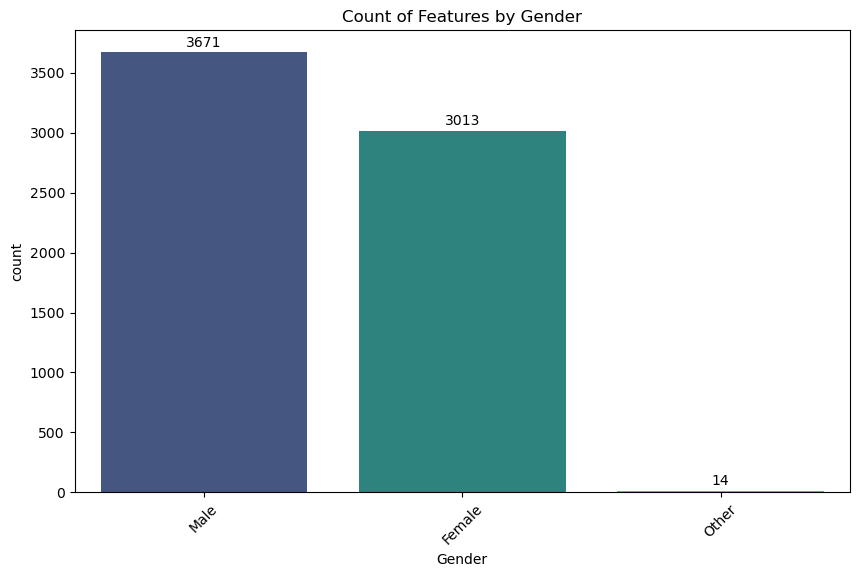

In [9]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=df_prediction['Gender'], palette='viridis')
plt.title('Count of Features by Gender')
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2)

plt.show()


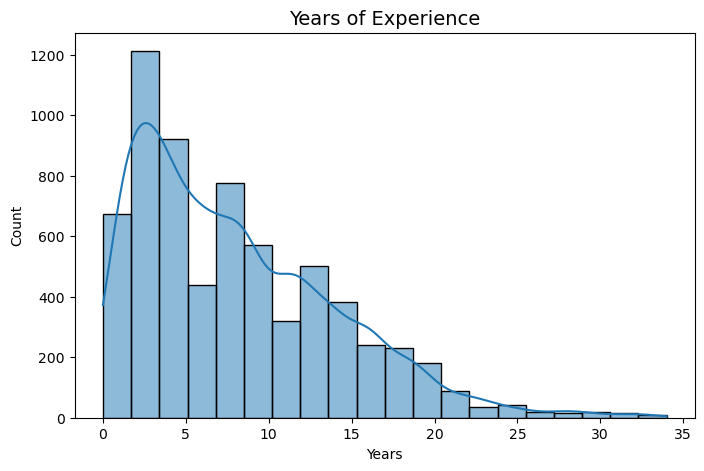

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df_prediction['Years of Experience'], kde=True, bins=20)
plt.title('Years of Experience', fontsize=14)
plt.xlabel('Years')
plt.ylabel('Count')
plt.show()

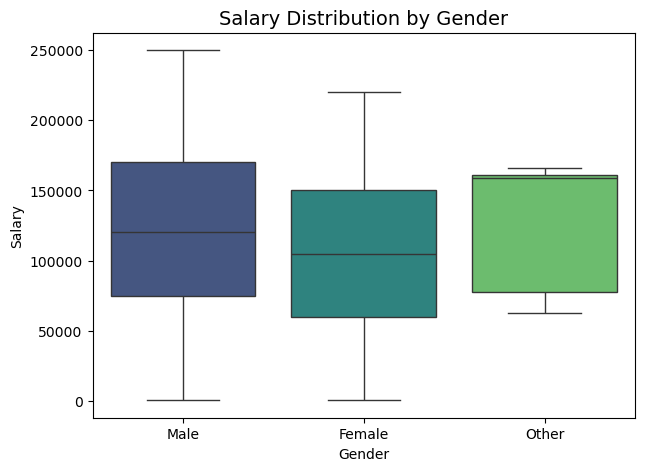

In [11]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Gender', y='Salary', data=df_prediction, palette='viridis')
plt.title('Salary Distribution by Gender', fontsize=14)
plt.show()

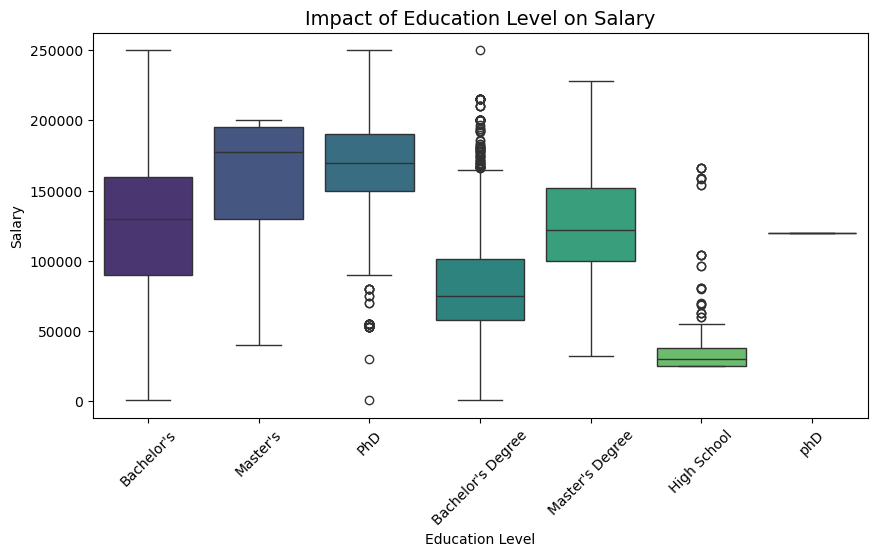

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Education Level', y='Salary', data=df_prediction, palette='viridis')
plt.title('Impact of Education Level on Salary', fontsize=14)
plt.xticks(rotation=45)
plt.show()

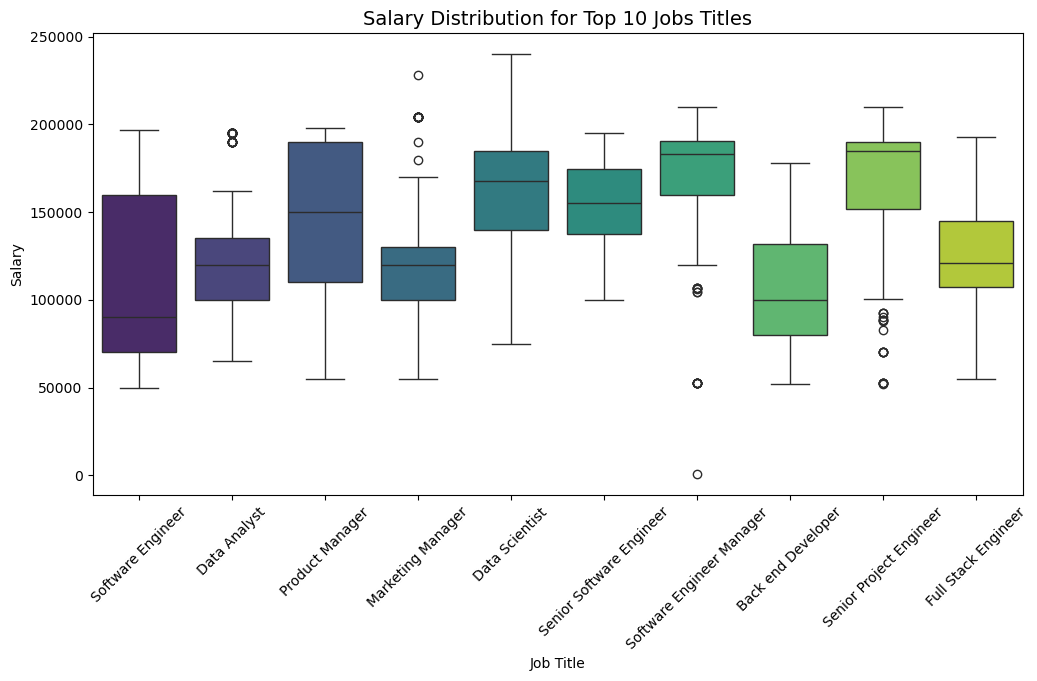

In [13]:
top10_jobs = df_prediction['Job Title'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='Job Title', y='Salary', data=df_prediction[df_prediction['Job Title'].isin(top10_jobs)], palette='viridis')
plt.title('Salary Distribution for Top 10 Jobs Titles', fontsize=14)
plt.xticks(rotation=45)
plt.show()

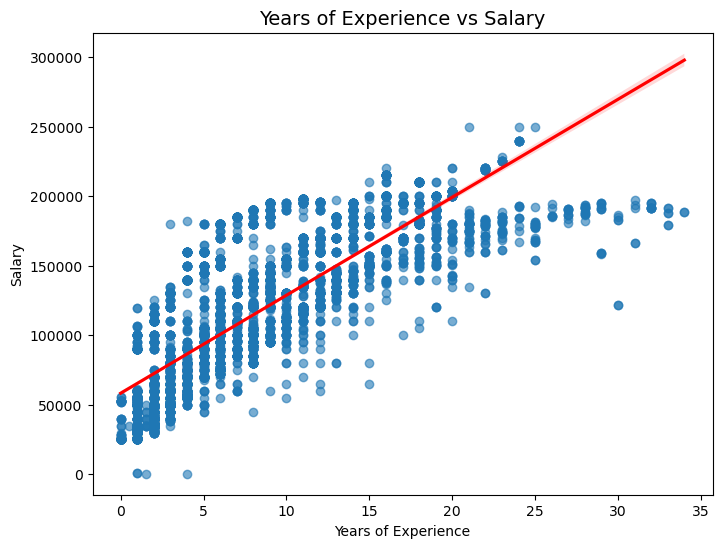

In [14]:
plt.figure(figsize=(8,6))
sns.regplot(x='Years of Experience', y='Salary', data=df_prediction, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Years of Experience vs Salary', fontsize=14)
plt.show()

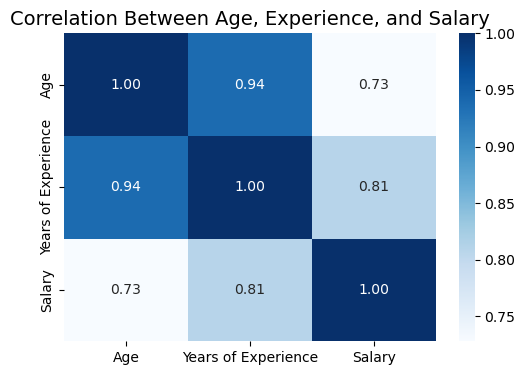

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df_prediction[['Age', 'Years of Experience', 'Salary']].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Between Age, Experience, and Salary', fontsize=14)
plt.show()

## Machine Learning

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [39]:
le = LabelEncoder()
for col in ["Gender", "Education Level", "Job Title"]:
    df_prediction[col] = le.fit_transform(df_prediction[col])

In [41]:
X = df_prediction.drop('Salary', axis=1)
y = df_prediction['Salary']

In [42]:
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
y = y.fillna(y.mean())

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
models= {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'KNN Regressor': KNeighborsRegressor()
}

In [46]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = r2_score(y_test, y_pred) * 100
    results[name] = acc

In [47]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy (%)'])
print(results_df)

                      Model  Accuracy (%)
0         Linear Regression     67.509863
1             Decision Tree     97.101771
2             Random Forest     97.533203
3         Gradient Boosting     93.524207
4  Support Vector Regressor      0.261788
5             KNN Regressor     96.646060


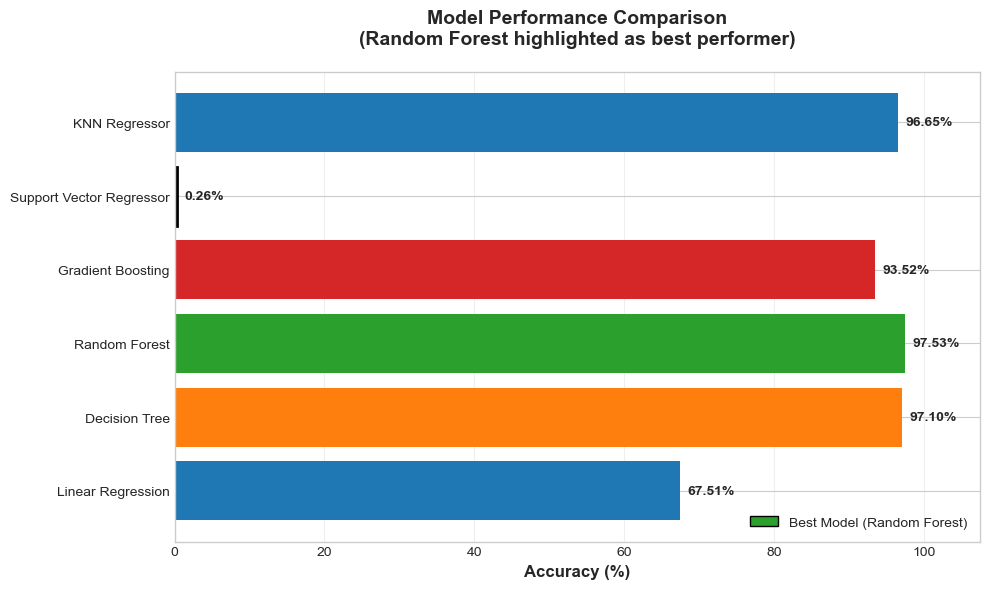

In [70]:
# Model Performance Comparison Visualization
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
bars = plt.barh(results_df['Model'], results_df['Accuracy (%)'], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Highlight the best model (Random Forest)
bars[4].set_color('#FFD700')  
bars[4].set_edgecolor('black')
bars[4].set_linewidth(2)

# Add value labels on bars
for i, (model, accuracy) in enumerate(zip(results_df['Model'], results_df['Accuracy (%)'])):
    plt.text(accuracy + 1, i, f'{accuracy:.2f}%', va='center', fontweight='bold')

plt.xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Performance Comparison\n(Random Forest highlighted as best performer)', 
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, results_df['Accuracy (%)'].max() + 10)

# Add legend for best model
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ca02c', edgecolor='black', label='Best Model (Random Forest)')]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()